In [2]:
#Grab Data

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
import random

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from keras.regularizers import l2
from keras.regularizers import l1_l2


In [23]:
def binaryfunc(target_price):
    binary = []
    price = 0
    for i in range(10):
        price += target_price[i]
    
    if price > 0: binary.append(1)
    else: binary.append(0)

    for i in range(10, len(target_price)):
        price -= target_price[i - 10]
        price += target_price[i]
        if price > 0: binary.append(1)
        else: binary.append(0)
    
    return binary

In [31]:
import dataset_creator
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv("BTCdata_final_binary.csv")

# data['avg10'] = data['Target_Price'].rolling(window=11, min_periods=1).mean().shift(-10)
# data['direction'] = np.where(data['avg10'] > 0, 1, 0)

# Extract features and target variable
# diff_price = dataset_creator.difference(data['Open Price'])
# diff_vol = dataset_creator.difference(data['Volume'])

# percent_price = dataset_creator.percent_difference(data['Open Price'])
# percent_vol = dataset_creator.percent_difference(data['Volume'])

### Use Percent Price, Difference Volume

# scaler = MinMaxScaler()
# price = scaler.fit_transform(np.array(data['Open Price']).reshape(-1, 1)).flatten().tolist()
# volume = scaler.fit_transform(np.array(data['Volume']).reshape(-1, 1)).flatten().tolist()

# price = [round(x, 4) for x in price]
# volume = [round(x, 4) for x in volume]


# lagging_size = 32
# lagging_price, target_price = dataset_creator.lagging_series(price, lagging_size)
# lagging_volume, target_volume = dataset_creator.lagging_series(volume, lagging_size)

# binary = dataset_creator.binary(target_price)

# df = pd.DataFrame()

# df['binary'] = binary

# for i in range(lagging_size):
#     df['p[t-' + str(i) + ']'] = lagging_price[i][:-9]

# for i in range(lagging_size):
#     df['v[t-' + str(i) + ']'] = lagging_volume[i][:-9]



# # Normalize the input features to a Gaussian distribution
# data = df


# Split the dataset into train and test sets based on time
split_index = int(0.7 * len(data))
train_set, test_set = np.split(data, [split_index])

X_columns = [f"p[t-{i}]" for i in range(32)] + [f"v[t-{i}]" for i in range(32)]
y_column = 'binary'

X_train = train_set[X_columns].values
y_train = train_set[y_column].values

X_test = test_set[X_columns].values
y_test = test_set[y_column].values




c:\Users\varun\miniconda3\envs\BTCProj\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [62]:

X_train = pd.DataFrame(X_train)
X_train.columns = X_columns
columns = ['binary'] + [f"v[t-{i}]" for i in range(32)]
data[columns]

,binary,v[t-0],v[t-1],v[t-2],v[t-3],v[t-4],v[t-5],v[t-6],v[t-7],v[t-8],...,v[t-22],v[t-23],v[t-24],v[t-25],v[t-26],v[t-27],v[t-28],v[t-29],v[t-30],v[t-31]
0,1,-0.1380,0.2396,-0.1846,0.0199,-0.0791,-0.8565,0.7766,0.3330,-0.9054,...,0.5263,-0.4791,-0.1237,-0.0416,-0.7969,-0.5656,1.3788,0.4572,-1.7082,0.8969
1,1,0.2360,-0.1380,0.2396,-0.1846,0.0199,-0.0791,-0.8565,0.7766,0.3330,...,-0.6130,0.5263,-0.4791,-0.1237,-0.0416,-0.7969,-0.5656,1.3788,0.4572,-1.7082
2,1,-0.2470,0.2360,-0.1380,0.2396,-0.1846,0.0199,-0.0791,-0.8565,0.7766,...,2.5559,-0.6130,0.5263,-0.4791,-0.1237,-0.0416,-0.7969,-0.5656,1.3788,0.4572
3,1,-0.0335,-0.2470,0.2360,-0.1380,0.2396,-0.1846,0.0199,-0.0791,-0.8565,...,-2.2722,2.5559,-0.6130,0.5263,-0.4791,-0.1237,-0.0416,-0.7969,-0.5656,1.3788
4,1,0.6319,-0.0335,-0.2470,0.2360,-0.1380,0.2396,-0.1846,0.0199,-0.0791,...,0.0213,-2.2722,2.5559,-0.6130,0.5263,-0.4791,-0.1237,-0.0416,-0.7969,-0.5656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051513,0,-0.0029,0.0357,-0.2767,0.1639,-0.0207,0.0257,0.0170,-0.1027,0.1595,...,-0.0223,-0.0135,0.0588,-0.0872,0.0248,-0.0636,0.0157,0.0716,-0.1543,0.0688
1051514,0,0.0825,-0.0029,0.0357,-0.2767,0.1639,-0.0207,0.0257,0.0170,-0.1027,...,1.6143,-0.0223,-0.0135,0.0588,-0.0872,0.0248,-0.0636,0.0157,0.0716,-0.1543
1051515,0,0.0829,0.0825,-0.0029,0.0357,-0.2767,0.1639,-0.0207,0.0257,0.0170,...,-1.5435,1.6143,-0.0223,-0.0135,0.0588,-0.0872,0.0248,-0.0636,0.0157,0.0716
1051516,0,-0.0865,0.0829,0.0825,-0.0029,0.0357,-0.2767,0.1639,-0.0207,0.0257,...,0.2127,-1.5435,1.6143,-0.0223,-0.0135,0.0588,-0.0872,0.0248,-0.0636,0.0157


In [12]:
# Define the MLP architecture
# l1 = 0.00
# l2 = 0.01
dropout = 0.1

model = Sequential([
    Dense(64, input_dim=64, activation='tanh'),  # First layer with input dimension of 32
    Dense(64, activation='tanh', kernel_regularizer=l2(0.00)),  # Second layer with tanh activation and L2 regularization
    Dropout(dropout),
    Dense(32, activation='relu', kernel_regularizer=l2(0.00)),  # Third layer with ReLU activation and L2 regularization
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])
# Compile the model with AUC-ROC metric and adjusted learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['auc'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=False, shuffle=False)

c:\Users\varun\miniconda3\envs\BTCProj\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.save('mlpnew.keras')


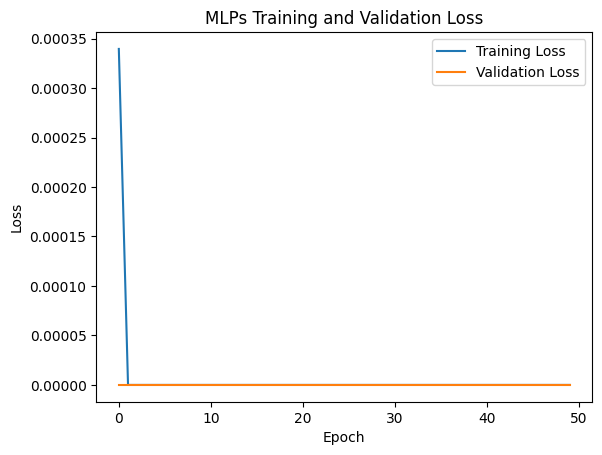

In [13]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLPs Training and Validation Loss')
plt.legend()
plt.show()


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,301 (122.27 KB)

 Trainable params: 10,433 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,868 (81.52 KB)

In [49]:
from keras.models import load_model, save_model

model = load_model('mlp0.53.h5')

23002/23002 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
AUC-ROC on test data: 0.5685197563226186


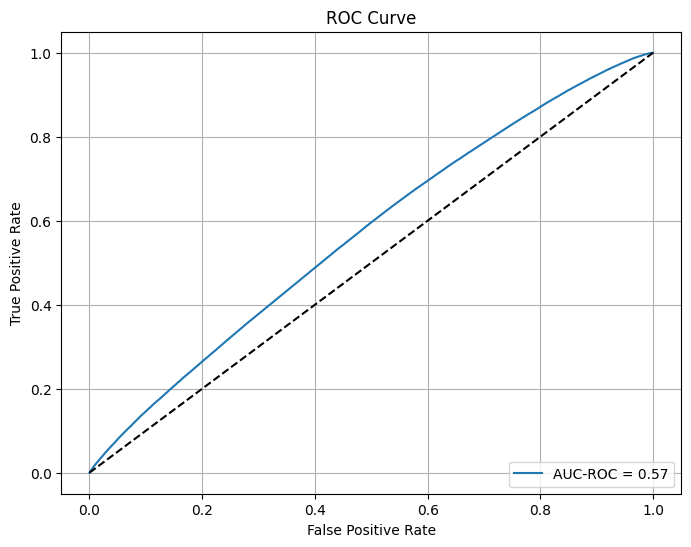

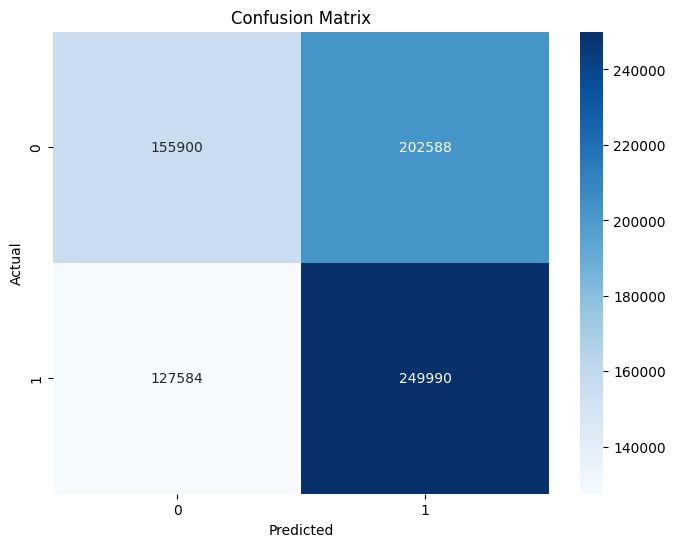

In [51]:

# Predict probabilities on test data
y_pred_proba = model.predict(X_train)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_train, y_pred_proba)
print(f"AUC-ROC on test data: {auc_roc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Predict classes on test data
y_pred = (y_pred_proba > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


9858/9858 ━━━━━━━━━━━━━━━━━━━━ 7s 732us/step
AUC-ROC on test data: 0.5266485836980987


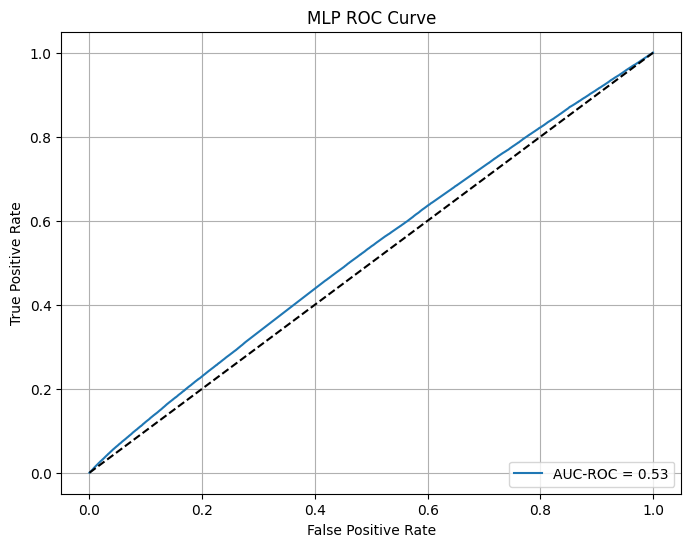

In [53]:
# Predict probabilities on test data
y_pred_proba = model.predict(X_test)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC on test data: {auc_roc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [18]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [15]:
import numpy as np

# Assuming X_train is your dataset
# Reshape the data to combine the features
X_train_new = np.concatenate((X_train[:, :32, np.newaxis], X_train[:, 32:, np.newaxis]), axis=2)

# Check the shape of the reshaped data
print("Shape of the reshaped data:", X_train_new.shape)


Shape of the reshaped data: (736062, 32, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout

model2 = Sequential([
    Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(64,1)),
    Dropout(0.2),
    Bidirectional(LSTM(units=64)),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['auc'])
# model2.summary()

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=False, shuffle=False)


In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model2 = Sequential([
    LSTM(units=64, input_shape=(64, 1)),  # Adjust num_features as per your data
    Dense(units=1, activation='sigmoid')  # Binary classification output
])

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['auc'])
# model2.summary()

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=False, shuffle=False)


c:\Users\varun\miniconda3\envs\BTCProj\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [ ]:
model2.save('lstm.h5')


In [ ]:
# Plot training history
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()


NameError: name 'history2' is not defined

In [ ]:

# Predict probabilities on test data
y_pred_proba = model2.predict(X_test)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC on test data: {auc_roc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Predict classes on test data
y_pred = (y_pred_proba > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [28]:
import auto_trader
import time
import dataset_creator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

auto_trader.buy()
# auto_trader.queue = auto_trader.build_queue()
import tensorflow as tf
from keras.models import load_model, save_model

model = load_model('mlp0.53.h5')

model.summary()




Status code: 403


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,435 (40.77 KB)

 Trainable params: 10,433 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

9858/9858 ━━━━━━━━━━━━━━━━━━━━ 8s 822us/step
AUC-ROC on test data: 0.5266485836980987


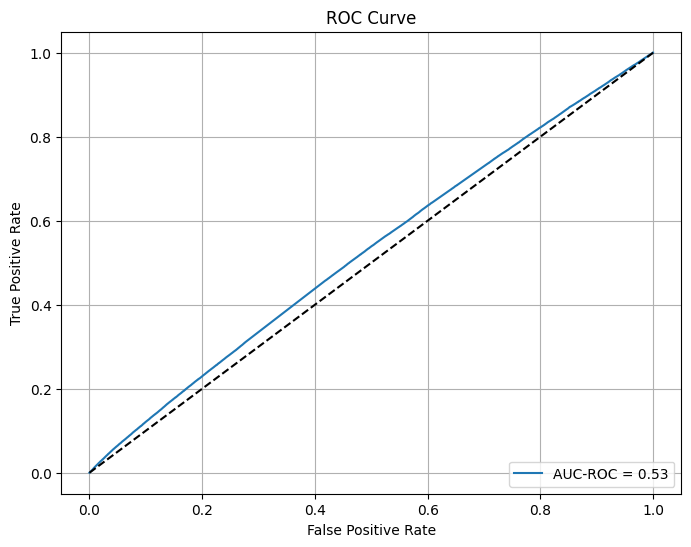

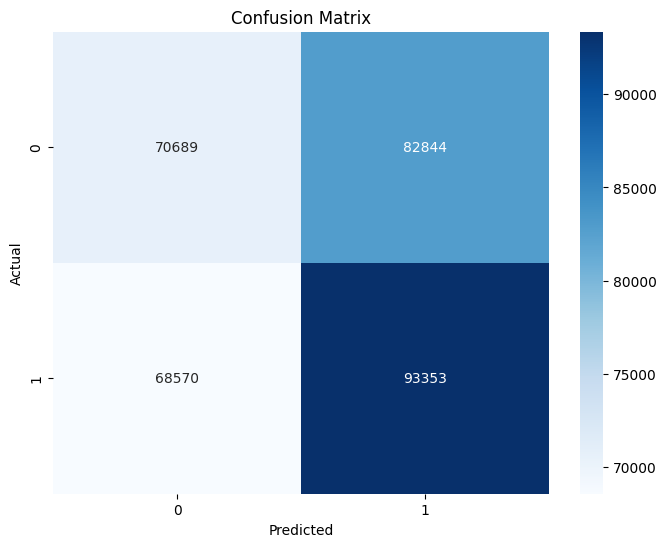

In [33]:

# Predict probabilities on test data
y_pred_proba = model.predict(X_test)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC on test data: {auc_roc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Predict classes on test data
y_pred = (y_pred_proba > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [45]:
y_pred_proba = model.predict(X_test)


9858/9858 ━━━━━━━━━━━━━━━━━━━━ 9s 855us/step


In [48]:
above_07_count = np.count_nonzero(y_pred_proba > 0.7)

# Count values below 0.3
below_03_count = np.count_nonzero(y_pred_proba < 0.3)

print("Number of values above 0.7:", above_07_count)
print("Number of values below 0.3:", below_03_count)
print(len(y_pred_proba))

Number of values above 0.7: 662
Number of values below 0.3: 9071
315456
